<a href="https://colab.research.google.com/github/neetuaashi/NeetuSingh/blob/master/Final_Prostrate_Cancer_CNN_Class.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
train_data = pd.read_excel('/content/drive/MyDrive/PCA_STAGE_BASED_CLASSIFICATION.xlsx')
train_data.head()

,PCA_STAGE,GSHG0000008,GSHG0000017,GSHG0000018,GSHG0000026,GSHG0000027,GSHG0000029,GSHG0000033,GSHG0000035,GSHG0000036,...,GSHG0051555,GSHG0051559,GSHG0051578,GSHG0051581,GSHG0051588,GSHG0051591,GSHG0051597,GSHG0051601,GSHG0051602,Outcome
0,pT3a,7.604725,5.93074,9.28309,7.242785,7.005525,7.14975,9.247600,7.486895,7.33985,...,6.59991,7.21917,5.038410,6.37504,6.64386,7.33092,7.816270,8.062970,7.10852,2
1,N_1,6.465740,6.08746,8.97728,7.531295,7.266755,7.40939,9.919400,7.479640,7.62205,...,9.45943,6.91886,5.101065,6.84549,5.93074,7.70044,8.787070,7.266755,7.37504,0
2,pT3b,7.317235,6.58496,8.29002,7.139515,7.339600,7.63662,9.137920,7.179600,7.15987,...,6.37504,7.41785,4.649605,7.14975,6.65821,7.49985,8.611960,7.751460,7.43463,3
3,N_2,6.445800,6.85798,8.85175,7.647455,7.503820,7.82655,9.880605,7.266755,7.43463,...,7.46761,7.42626,5.409290,7.24793,6.20945,7.08746,9.476720,7.320545,7.24793,0
4,pT3a,7.021685,6.32193,8.47978,7.554565,7.441775,7.89482,9.462780,7.004740,7.05528,...,6.33985,7.15987,4.779210,6.94251,6.18982,7.62936,8.183205,6.766785,7.88264,2


Data Wrangling

In [ ]:
train_data.isnull().sum()

PCA_STAGE      0
GSHG0000008    0
GSHG0000017    0
GSHG0000018    0
GSHG0000026    0
              ..
GSHG0051591    0
GSHG0051597    0
GSHG0051601    0
GSHG0051602    0
Outcome        0
Length: 16204, dtype: int64

In [ ]:

train_data = train_data.drop(['PCA_STAGE'], axis = 1)

In [ ]:
train_data.shape

(137, 16203)

In [ ]:
train_data['Outcome'] = train_data['Outcome'].astype('int')


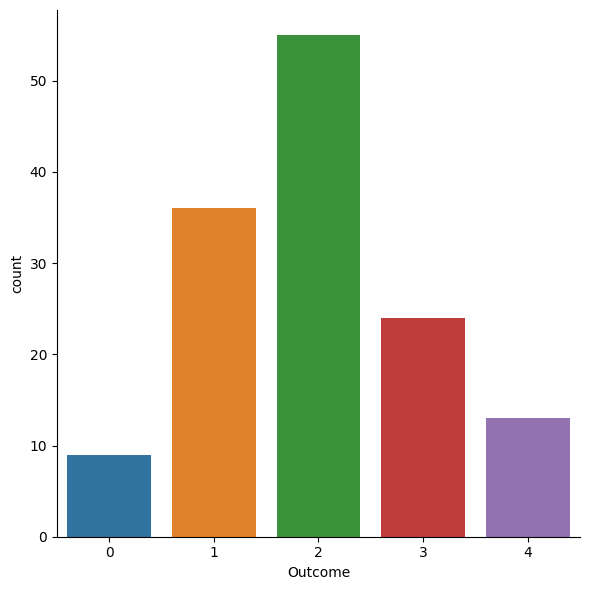

In [ ]:
# Display counts of classes
sns.catplot(x = 'Outcome', kind = "count", data = train_data, height = 6)

In [ ]:
train_data['Outcome'].value_counts()

2    55
1    36
3    24
4    13
0     9
Name: Outcome, dtype: int64

In [ ]:
# Splitting data into classes
df_0 = train_data[train_data['Outcome'] == 0]
df_1 = train_data[train_data['Outcome'] == 1]
df_2 = train_data[train_data['Outcome'] == 2]
df_3 = train_data[train_data['Outcome'] == 3]
df_4 = train_data[train_data['Outcome'] == 4]

In [ ]:
# Resample using "Bootstrapping" method to regenerate samples by upsampling for each class.
from sklearn.utils import resample

In [ ]:
df_0_upsample = resample(df_0, n_samples = 100, replace = True, random_state = 123)
df_1_upsample = resample(df_1, n_samples = 100, replace = True, random_state = 123)
df_2_upsample = resample(df_2, n_samples = 100, replace = True, random_state = 123)
df_3_upsample = resample(df_3, n_samples = 100, replace = True, random_state = 123)
df_4_upsample = resample(df_4, n_samples = 100, replace = True, random_state = 123)

In [ ]:
# Merge all dataframes to create new train samples
train_df = pd.concat([df_0_upsample, df_1_upsample, df_2_upsample, df_3_upsample, df_4_upsample])

In [ ]:
train_df['Outcome'].value_counts()

0    100
1    100
2    100
3    100
4    100
Name: Outcome, dtype: int64

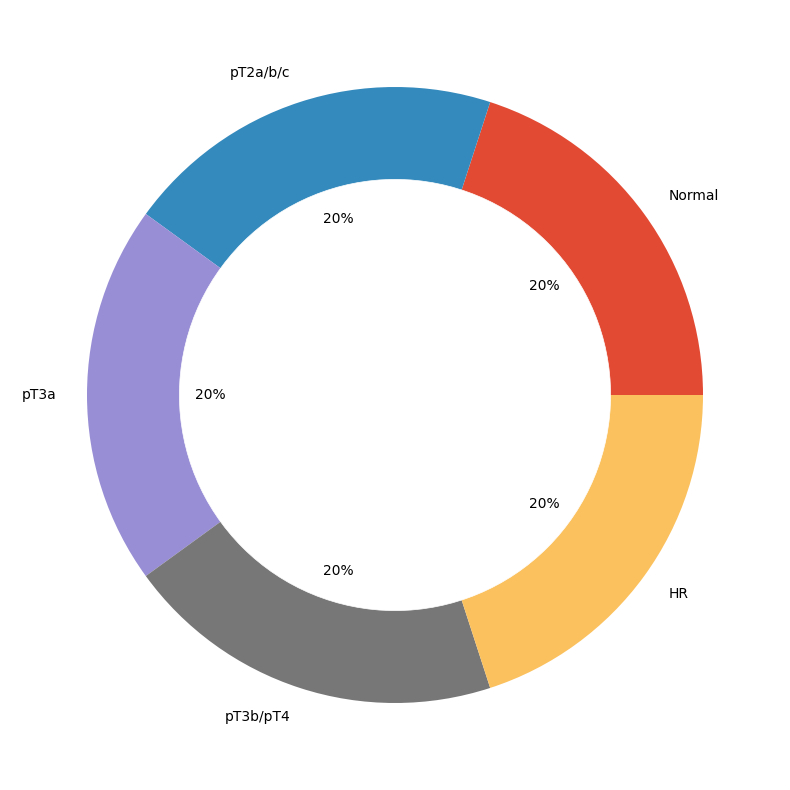

In [ ]:
plt.style.use('ggplot')
plt.figure(figsize=(10,10))
my_circle = plt.Circle((0,0), 0.7, color = 'white')
plt.pie(train_df['Outcome'].value_counts(), labels = ['Normal','pT2a/b/c','pT3a',
                                                  'pT3b/pT4', 'HR'], autopct = '%0.0f%%')
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

In [ ]:
X = train_df.drop('Outcome', axis = 1)
Y = train_df['Outcome']

In [ ]:
from sklearn.model_selection import train_test_split
# spliting of training & test is 80% to 20% ratio
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 2)

In [ ]:
x_train.shape

(400, 16202)

In [ ]:
x_test.shape

(100, 16202)

In [ ]:
from keras.utils.np_utils import to_categorical

In [ ]:
y_train = to_categorical(y_train)

In [ ]:
y_train

array([[0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.]], dtype=float32)

In [ ]:
y_test = to_categorical(y_test)

In [ ]:
y_test

array([[0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0.

In [ ]:
x_train = x_train.iloc[:, :-1].values
x_test = x_test.iloc[:, :-1].values

x_train.shape

(400, 16201)

In [ ]:
x_train = x_train.reshape(len(x_train), x_train.shape[1], 1)
x_test = x_test.reshape(len(x_test), x_test.shape[1], 1)

In [ ]:
x_train = x_train.reshape(x_train.shape[0],x_train.shape[1], 1)
x_test = x_test.reshape( x_test.shape[0],x_train.shape[1], 1)

In [ ]:
x_train.shape

(400, 16201, 1)

In [ ]:
x_train [0]

array([[7.03136 ],
       [7.11894 ],
       [8.89482 ],
       ...,
       [7.29462 ],
       [6.25736 ],
       [8.201625]])

In [ ]:
x_test.shape

(100, 16201, 1)

CNN 1D

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten
from tensorflow.keras.optimizers import Adam
# Avoid Overfitting of NN by Normalizing the samples
from tensorflow.keras.layers import BatchNormalization

In [ ]:
def build_model():
    model = Sequential()
    # Filters = No. of Neurons
    # Padding = 'same' : Zero Padding; Padding = 'valid' : valid padding
    model.add(Conv1D(filters = 64, kernel_size = 5, activation = 'relu', padding = 'same', input_shape = (16201,1)))
    # BatchNormalization to avoid overfitting
    model.add(BatchNormalization())
    # Pooling
    model.add(MaxPooling1D(pool_size=(2), strides=(2), padding='same'))

    # Conv Layer - II
    model.add(Conv1D(filters = 64, kernel_size = 5, activation = 'relu', padding = 'same'))
    model.add(BatchNormalization())
    model.add(MaxPooling1D(pool_size=(2), strides=(2), padding='same'))

    # Conv Layer - III
    model.add(Conv1D(filters = 64, kernel_size = 5, activation = 'relu', padding = 'same'))
    model.add(BatchNormalization())
    model.add(MaxPooling1D(pool_size=(2), strides=(2), padding='same'))

    # Conv Layer - IV
    model.add(Conv1D(filters = 64, kernel_size = 5, activation = 'relu', padding = 'same'))
    model.add(BatchNormalization())
    model.add(MaxPooling1D(pool_size=(2), strides=(2), padding='same'))

    # Conv Layer -V
    model.add(Conv1D(filters = 64, kernel_size = 5, activation = 'relu', padding = 'same'))
    model.add(BatchNormalization())
    model.add(MaxPooling1D(pool_size=(2), strides=(2), padding='same'))

    # Flatten
    model.add(Flatten())

    # Fully Connected Layer (FC - Layer)
    model.add(Dense(units = 64, activation='relu'))
    # Hidden Layer
    model.add(Dense(units = 64, activation='relu'))
    # Output Layer
    model.add(Dense(units = 5, activation='softmax'))

    # loss = 'categorical_crossentropy'
    model.compile(optimizer = 'Adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

    return model

model = build_model()

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 16201, 64)         384       
                                                                 
 batch_normalization (BatchN  (None, 16201, 64)        256       
 ormalization)                                                   
                                                                 
 max_pooling1d (MaxPooling1D  (None, 8101, 64)         0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 8101, 64)          20544     
                                                                 
 batch_normalization_1 (Batc  (None, 8101, 64)         256       
 hNormalization)                                                 
                                                        

In [ ]:
# save best model
from tensorflow.keras import callbacks
filepath = '/content/drive/MyDrive/Prostrate_Model.hdf5'

checkpoint = callbacks.ModelCheckpoint(filepath, monitor='val_loss', save_best_only=True,
                                       mode = 'min', verbose = 1)
checkpoint


In [ ]:
import os
import datetime
from tensorflow import keras
logdir = os.path.join("/content/drive/MyDrive/Prostrate_Model_logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tensorboard_callback = keras.callbacks.TensorBoard(logdir)

In [ ]:
history = model.fit(x_train, y_train, epochs = 16, batch_size = 10, validation_data = (x_test, y_test))

Epoch 1/16
40/40 [==============================] - 17s 50ms/step - loss: 2.3392 - accuracy: 0.4425 - val_loss: 1.8390 - val_accuracy: 0.1900
Epoch 2/16
40/40 [==============================] - 1s 37ms/step - loss: 0.6777 - accuracy: 0.7225 - val_loss: 8.6774 - val_accuracy: 0.2000
Epoch 3/16
40/40 [==============================] - 1s 35ms/step - loss: 0.1482 - accuracy: 0.9525 - val_loss: 14.6013 - val_accuracy: 0.2000
Epoch 4/16
40/40 [==============================] - 1s 35ms/step - loss: 0.0677 - accuracy: 0.9700 - val_loss: 10.9221 - val_accuracy: 0.2000
Epoch 5/16
40/40 [==============================] - 1s 36ms/step - loss: 0.0317 - accuracy: 0.9925 - val_loss: 1.6893 - val_accuracy: 0.3700
Epoch 6/16
40/40 [==============================] - 1s 34ms/step - loss: 0.0070 - accuracy: 0.9975 - val_loss: 1.1485 - val_accuracy: 0.4900
Epoch 7/16
40/40 [==============================] - 1s 36ms/step - loss: 0.0296 - accuracy: 0.9875 - val_loss: 0.6136 - val_accuracy: 0.8300
Epoch 8/16

In [ ]:
pd.DataFrame(history.history)

,loss,accuracy,val_loss,val_accuracy
0,2.339224,0.4425,1.838969,0.19
1,0.677682,0.7225,8.677404,0.20
2,0.148168,0.9525,14.601324,0.20
3,0.067705,0.9700,10.922053,0.20
4,0.031696,0.9925,1.689284,0.37
5,0.007018,0.9975,1.148484,0.49
6,0.029557,0.9875,0.613563,0.83
7,0.035547,0.9875,0.648836,0.69
8,0.002642,1.0000,0.138383,0.97
9,0.000567,1.0000,0.050654,0.98


<Axes: >

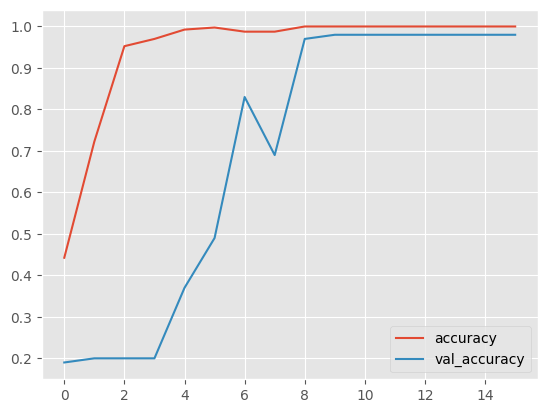

In [ ]:
pd.DataFrame(history.history)[['accuracy', 'val_accuracy']].plot()

<Axes: >

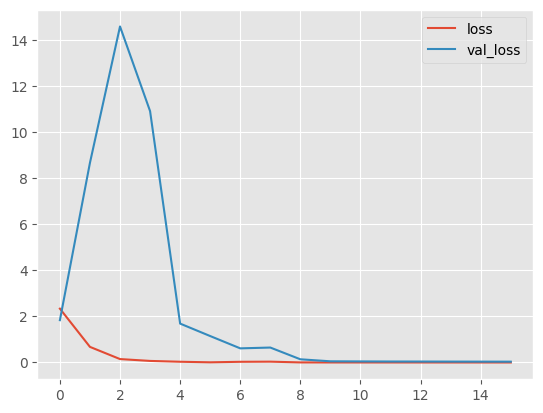

In [ ]:
pd.DataFrame(history.history)[['loss','val_loss']].plot()

In [ ]:
# Classification Report

In [ ]:
model.evaluate(x_test, y_test)

4/4 [==============================] - 1s 76ms/step - loss: 0.0353 - accuracy: 0.9800


[0.035250432789325714, 0.9800000190734863]

In [ ]:
# Make Prediction
predict = model.predict(x_test)

4/4 [==============================] - 1s 30ms/step


In [ ]:
predict

array([[4.66868878e-05, 9.99867082e-01, 6.65110492e-05, 1.90165756e-05,
        6.40797907e-07],
       [1.38520145e-05, 8.63178447e-02, 9.12861884e-01, 6.69644622e-04,
        1.36822229e-04],
       [5.42304290e-09, 6.77304388e-06, 3.01043514e-07, 1.19482487e-04,
        9.99873400e-01],
       [5.24342831e-05, 2.53490430e-06, 4.93913249e-05, 9.99893546e-01,
        2.11063843e-06],
       [3.25617566e-06, 1.95244356e-04, 9.99790370e-01, 3.65408232e-06,
        7.55248175e-06],
       [4.14394352e-11, 6.84931422e-07, 7.24529201e-08, 2.81164484e-05,
        9.99971151e-01],
       [9.99809206e-01, 7.25887367e-05, 6.59566067e-05, 5.23037561e-05,
        1.05664730e-08],
       [9.92932314e-08, 7.97000936e-08, 2.61552806e-08, 3.48365313e-04,
        9.99651432e-01],
       [7.05610603e-07, 1.70867992e-04, 1.99321308e-04, 9.99590337e-01,
        3.86772153e-05],
       [5.77704329e-10, 2.96025149e-07, 6.52742223e-04, 9.99346316e-01,
        7.50268043e-07],
       [7.04063075e-09, 8.4555

In [ ]:
yhat = np.argmax(predict, axis = 1)

In [ ]:
# Distributed probability to discrete class
yhat = np.argmax(predict, axis = 1)
yhat

array([1, 2, 4, 3, 2, 4, 0, 4, 3, 3, 4, 3, 1, 1, 3, 1, 3, 4, 3, 1, 4, 0,
       2, 3, 0, 1, 0, 3, 4, 0, 1, 2, 3, 1, 2, 1, 1, 3, 2, 3, 2, 0, 4, 0,
       0, 4, 4, 2, 1, 4, 4, 3, 2, 2, 4, 4, 0, 0, 4, 3, 4, 1, 1, 2, 4, 2,
       2, 0, 0, 3, 0, 0, 3, 1, 3, 1, 0, 0, 4, 4, 4, 2, 3, 0, 1, 1, 2, 4,
       0, 2, 0, 0, 4, 1, 2, 3, 1, 4, 3, 1])

In [ ]:
y_test=np.argmax(predict, axis = 1)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix



In [ ]:
confusion_matrix( yhat, y_test)


array([[20,  0,  0,  0,  0],
       [ 0, 20,  0,  0,  0],
       [ 0,  0, 17,  0,  0],
       [ 0,  0,  0, 20,  0],
       [ 0,  0,  0,  0, 23]])

<Axes: >

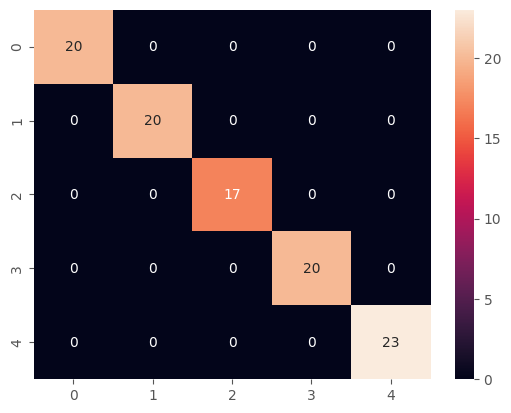

In [ ]:
sns.heatmap(confusion_matrix(y_test, yhat), annot = True, fmt='0.0f')

In [ ]:
print(classification_report(yhat, y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       1.00      1.00      1.00        20
           2       1.00      1.00      1.00        17
           3       1.00      1.00      1.00        20
           4       1.00      1.00      1.00        23

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100



In [ ]:
test_data = pd.read_excel('/content/drive/MyDrive/Table 10. Test PCA_STAGE_BASED_CLASSIFICATION.xlsx')

In [ ]:
X_test = test_data.iloc[:, :-1].values
X_test.shape

(137, 16202)

In [ ]:
X_test = X_test.reshape(len(X_test), X_test.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1], 1)
X_test.shape

(137, 16202, 1)

In [ ]:
# Make Prediction
predict = model.predict(X_test)

5/5 [==============================] - 1s 68ms/step


In [ ]:
yhat = np.argmax(predict, axis = 1)

In [ ]:
# Distributed probability to discrete class
yhat = np.argmax(predict, axis = 1)
yhat

array([2, 0, 3, 0, 2, 0, 2, 0, 2, 0, 3, 0, 2, 0, 1, 0, 2, 3, 1, 1, 2, 4,
       4, 4, 4, 4, 3, 3, 3, 2, 3, 3, 2, 2, 3, 1, 3, 2, 3, 3, 1, 2, 2, 1,
       1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 2, 2, 1, 2, 2, 1, 1, 1, 1, 2, 2, 1,
       3, 3, 2, 2, 3, 2, 2, 2, 3, 1, 2, 2, 2, 3, 3, 3, 1, 1, 1, 3, 1, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 3, 0, 1, 1, 2, 4, 4, 4, 4,
       4, 4, 4, 4, 1, 3, 3, 2, 2, 1, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 2, 3,
       2, 3, 1, 3, 2])